In [12]:
import sys
import numpy as np
sys.path.append('/Users/IzmailovPavel/Documents/Education/Projects/Course Project/Code')
import numpy as np
import matplotlib as mpl

from matplotlib import pyplot as plt

from GP.covariance_functions import SquaredExponential
from GP.gaussian_process_regression import GPR

from scipy.linalg import orth

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data_params = np.array([1.0, 0.3, 0.1])
data_covariance_obj = SquaredExponential(data_params)

In [3]:
gp = GPR(data_covariance_obj)
num = 500
test_num = 100
dim = 2
seed = 10

In [28]:
np.random.seed(seed)
#x_tr = np.random.rand(dim, num)
x_tr = np.random.normal(size=(dim, num))
if dim == 1:
    x_test = np.linspace(0, 1, test_num)
    x_test = x_test.reshape(1, test_num)
else:
    #x_test = np.random.rand(dim, test_num)
    x_test = np.random.normal(size=(dim, test_num))

x_tr /= 3
x_test /= 3
y_tr, y_test = gp.generate_data(x_tr, x_test, seed=seed)
x_tr = x_tr.T
x_test = x_test.T

In [29]:
# dummy dimension
x_tr = np.hstack([x_tr, np.random.normal(size=(num, 1)) / 3])
x_test = np.hstack([x_test, np.random.normal(size=(test_num, 1)) / 3])

In [30]:
D = x_tr.shape[1]
P = np.random.rand(D, D)
P = orth(P)

In [31]:
P

array([[-0.55146753,  0.59970966,  0.57985506],
       [-0.69049789,  0.06187124, -0.72068344],
       [-0.46807717, -0.79782221,  0.37997827]])

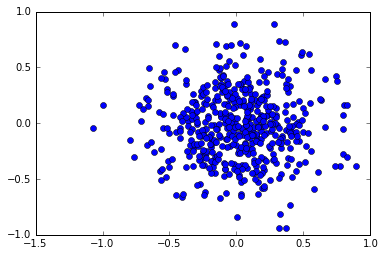

In [32]:
plt.plot(x_tr[:, 0], x_tr[:, 1], 'bo')

In [33]:
projected = x_tr.dot(P)
projected_test = x_test.dot(P)

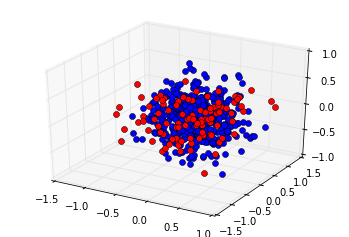

In [34]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(projected[:, 0], projected[:, 1], projected[:, 2], 'bo')
ax.plot(projected_test[:, 0], projected_test[:, 1], projected_test[:, 2], 'ro')

In [37]:
np.save('x_tr.npy', projected)
np.save('x_te.npy', projected_test)
np.save('y_tr.npy', y_tr)
np.save('y_te.npy', y_test)

In [92]:
P_learned = np.array([[1.12, -0.65, 0.04], [0.25, 0.38, 1.07]])
P_learned = orth(P_learned.T).T

In [41]:
true_projected = x_tr[:, :2].dot(P[:2, :])
approx_projected = x_tr[:, :2].dot(P_learned)

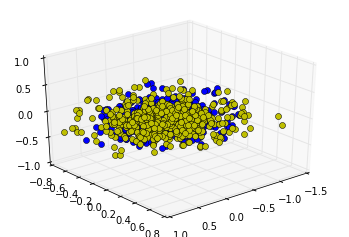

In [105]:
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.view_init(55, 50)
ax.view_init(30, 50)
ax.plot(true_projected[:, 0], true_projected[:, 1], true_projected[:, 2], 'bo')
ax.plot(approx_projected[:, 0], approx_projected[:, 1], approx_projected[:, 2], 'yo')

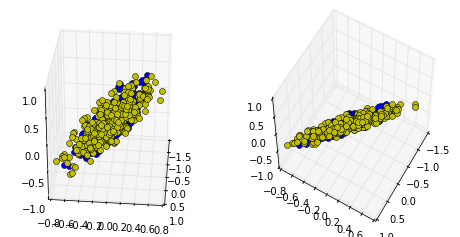

In [114]:
fig = plt.figure(figsize=plt.figaspect(.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax = fig.gca(projection='3d')
# ax.view_init(55, 50)
ax.view_init(30, 5)
ax.plot(true_projected[:, 0], true_projected[:, 1], true_projected[:, 2], 'bo')
ax.plot(approx_projected[:, 0], approx_projected[:, 1], approx_projected[:, 2], 'yo')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax = fig.gca(projection='3d')
ax.view_init(55, 30)
ax.plot(true_projected[:, 0], true_projected[:, 1], true_projected[:, 2], 'bo')
ax.plot(approx_projected[:, 0], approx_projected[:, 1], approx_projected[:, 2], 'yo')